<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

In [3]:
#Hay que revisar que no hayan elementos NAN
df.isna().all().unique()

array([False])

Desde el dataset, debido a que es un *conjunto supervisado*, se deben crear los conjuntos de atributos y características, y el conjunto de las etiquetas.

In [4]:
X = df.loc[:, df.columns[2:]].values
y = df.loc[:, ['diagnosis']].values

In [5]:
#Se normaliza con Standard Scaler
X = StandardScaler().fit_transform(X)

Se debe realizar un análisis exploratorio de los datos

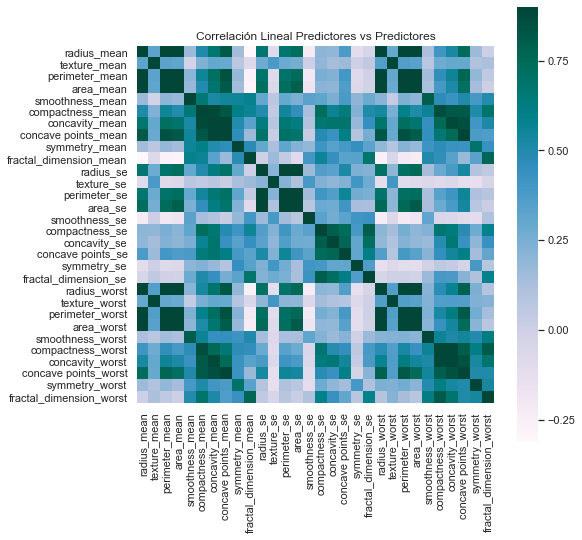

In [6]:
predictor_names = df.columns[2:]
n_show = min(len(predictor_names),50)

corrmat = df[predictor_names[:n_show]].corr() #Correlación de las variables
fig, ax = plt.subplots(figsize=(8, 8)) 
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax,cmap="PuBuGn") #Mapa de calor
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

Es sabido que, las áreas donde se tiene zonas más oscuras, indican una mayor correlación de las variables. Esto es malo a la hora de entrenar el modelo. Siempre se trata de que las variables sean lo más linealmente independientes entre sí para no caer en el overfitting. Para lidiar con esto, se realizará una reducción de la dimensionalidad.

In [7]:
pca = PCA(n_components=10) #Modelo, se tomarán 10 n-componentes, es decir, se tomarán 10 variables para reducir la dimensión
principalComponents = pca.fit_transform(X) #fit del modelo

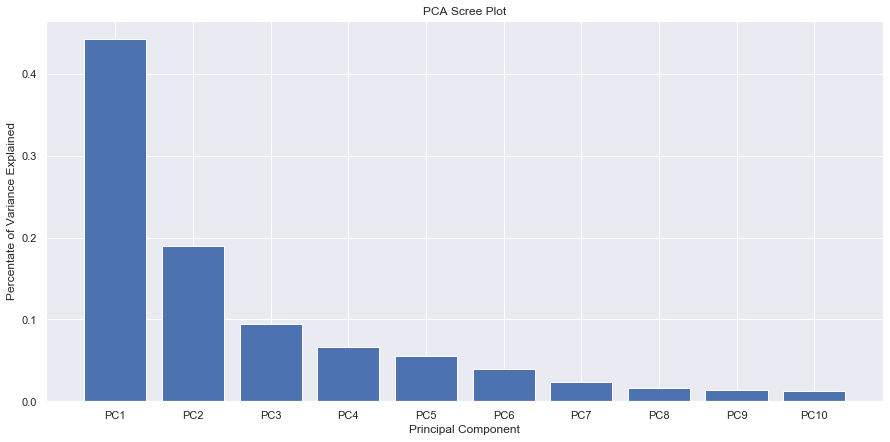

In [8]:
#Varianzas por n-componentes
percent_variance = np.round(pca.explained_variance_ratio_, decimals =3)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(15,7))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

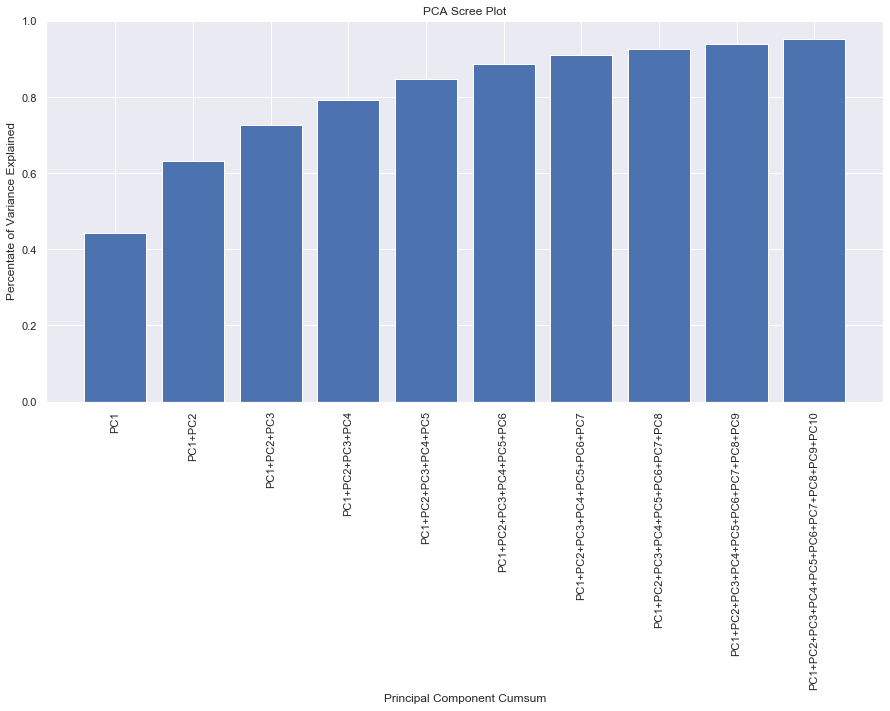

In [9]:
# Gráfico de Varianza acumulada entre las n-componentes
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 
           'PC1+PC2', 
           'PC1+PC2+PC3', 
           'PC1+PC2+PC3+PC4', 
           'PC1+PC2+PC3+PC4+PC5', 
           'PC1+PC2+PC3+PC4+PC5+PC6',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10']

plt.figure(figsize=(15,7))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.xticks(x= range(1,11), rotation='vertical')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [10]:
#Veamos cuanto es el valor del acumulado al final
percent_variance_cum[9]

0.9530000000000001

Lo anterior nos indica que con solo 10 n-componentes se puede resumir la información del dataset en un 95.3%. Hemos de ver cuales son dichos componentes.

In [11]:
principalDataframe = pd.DataFrame(data = principalComponents, 
                                  columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
targetDataframe = df[['diagnosis']]

df_reducido = pd.concat([principalDataframe, targetDataframe],axis = 1)
df_reducido.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398408,-0.157120,-0.877403,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711902,1.106993,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097377,0.024071,0.454285,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059569,-1.405430,-1.116961,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636375,-0.263808,0.377701,1


Y listo! Se redujo la dimensionalidad del problema a través del Principal Component Analisys. 
Se pasará ahora a hacer el ajuste de los modelos, y evaluar en base a las métricas que se impongan.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

#Se utilizan las componentes proyectadas
X = df_reducido[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]
Y = df_reducido['diagnosis']

#Se crean los conjuntos de entrenamiento y test desde los conjuntos definidos anteriormente
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

Se utilizarán como clasificadores **Support Vector Machine-C, Random Forest y OVO.**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn import svm

#Se crean los clasificadores
clf1 = svm.SVC(random_state=2) # Clasificador 1: SVM-C
clf2 = RandomForestClassifier(max_depth=2, random_state=2) # Clasificador 2: Random Forest
clf3 = OneVsOneClassifier(LinearSVC(random_state=2)) # Clasificador 3: OVO

In [14]:
#Se fittean los clasificadores a los conjuntos de entrenamiento
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)
clf3.fit(X_train,Y_train)

C:\Users\56982\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\56982\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=2, tol=0.0001, verbose=0),
                   n_jobs=None)

Se han de revisar los predictores.

In [15]:

#Y_predict i _train/test representa la predicción del conjunto de train/test para el i-ésimo modelo
Y_predict1_train = clf1.predict(X_train)
Y_predict1_test = clf1.predict(X_test)

Y_predict2_train = clf2.predict(X_train)
Y_predict2_test = clf2.predict(X_test)

Y_predict3_train = clf3.predict(X_train)
Y_predict3_test = clf3.predict(X_test)

Se utilizará la **accuracy** como métrica para evaluar.

In [16]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [17]:
print('Accuracy Score sobre train_set - SVM-C: ', metrics.accuracy_score(Y_train, Y_predict1_train))
print('Accuracy Score sobre test_set - SVM-C: ', metrics.accuracy_score(Y_test, Y_predict1_test)) 
print('')
print('Accuracy Score sobre train_set - Random Forest: ', metrics.accuracy_score(Y_train, Y_predict2_train))
print('Accuracy Score sobre test_set - Random Forest: ', metrics.accuracy_score(Y_test, Y_predict2_test)) 
print('')
print('Accuracy Score sobre train_set - OVO: ', metrics.accuracy_score(Y_train, Y_predict3_train))
print('Accuracy Score sobre test_set - OVO: ', metrics.accuracy_score(Y_test, Y_predict3_test))

Accuracy Score sobre train_set - SVM-C:  0.9921259842519685
Accuracy Score sobre test_set - SVM-C:  0.9521276595744681

Accuracy Score sobre train_set - Random Forest:  0.9212598425196851
Accuracy Score sobre test_set - Random Forest:  0.9202127659574468

Accuracy Score sobre train_set - OVO:  0.9868766404199475
Accuracy Score sobre test_set - OVO:  0.973404255319149


Se tienen buenos resultados. La accuracy de los conjuntos de testeo y training son muy parecidos. Lo anterior indica que probablemente **no hay overfitting**. PCA ayuda a hacer linealmente independiente los datos.

Sin embargo, existe un problema. Puede que no se esté considerando algo, para ello, se verán como rinden las otras métricas. Es de destacar que se utilizará el promedio con pesos.

In [23]:
print('Métricas SVM:')
print('')

print('SUPPORT VECTOR MACHINE-C Train')
print('Accuracy Score - SVM - Train:', metrics.accuracy_score(Y_train, Y_predict1_train))
print('F1 Score - SVM - Train:', metrics.f1_score(Y_train, Y_predict1_train,average='weighted'))
class_report_RF_1 = classification_report(Y_train, Y_predict1_train) #classification report
print(class_report_RF_1)
print('')
print('')


print('SUPPORT VECTOR MACHINE-C Test')
print('Accuracy Score - SVM - Test:', metrics.accuracy_score(Y_test, Y_predict1_test))
print('F1 Score - SVM - Test:', metrics.f1_score(Y_test, Y_predict1_test,average='weighted'))
class_report_RF_2 = classification_report(Y_test, Y_predict1_test)
print(class_report_RF_2)
print('')
print('')

Métricas SVM:

SUPPORT VECTOR MACHINE-C Train
Accuracy Score - SVM - Train: 0.9921259842519685
F1 Score - SVM - Train: 0.9921072876904014
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       242
           1       1.00      0.98      0.99       139

    accuracy                           0.99       381
   macro avg       0.99      0.99      0.99       381
weighted avg       0.99      0.99      0.99       381



SUPPORT VECTOR MACHINE-C Test
Accuracy Score - SVM - Test: 0.9521276595744681
F1 Score - SVM - Test: 0.9522932588362067
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       115
           1       0.92      0.96      0.94        73

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188





In [21]:
print('Métricas Random Forest:')
print('')

print('RANDOM FOREST Train')
print('Accuracy Score - RFC - Train:', metrics.accuracy_score(Y_train, Y_predict2_train))
print('F1 Score - RFC - Train:', metrics.f1_score(Y_train, Y_predict2_train,average='weighted'))
class_report_RF_3 = classification_report(Y_train, Y_predict2_train) #classification report
print(class_report_RF_3)
print('')
print('')


print('RANDOM FOREST Test')
print('Accuracy Score - RFC - Test:', metrics.accuracy_score(Y_test, Y_predict2_test))
print('F1 Score - RFC - Test:', metrics.f1_score(Y_test, Y_predict2_test,average='weighted'))
class_report_RF_4 = classification_report(Y_test, Y_predict2_test)
print(class_report_RF_4)
print('')
print('')

Métricas Random Forest:

RANDOM FOREST Train
Accuracy Score - RFC - Train: 0.9212598425196851
F1 Score - RFC - Train: 0.9213776960452557
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       242
           1       0.89      0.90      0.89       139

    accuracy                           0.92       381
   macro avg       0.91      0.92      0.92       381
weighted avg       0.92      0.92      0.92       381



RANDOM FOREST Test
Accuracy Score - RFC - Test: 0.9202127659574468
F1 Score - RFC - Test: 0.9198894886503324
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       115
           1       0.91      0.88      0.90        73

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.92       188
weighted avg       0.92      0.92      0.92       188





In [24]:
print('Métricas One Vs One:')
print('')
print('ONE VS ONE Train')
print('Accuracy Score - OVO - Train:', metrics.accuracy_score(Y_train, Y_predict3_train))
print('F1 Score - OVO - Train:', metrics.f1_score(Y_train, Y_predict3_train,average='weighted'))
class_report_RF_5 = classification_report(Y_train, Y_predict3_train) #classification report
print(class_report_RF_5)
print('')
print('')


print('ONE VS ONE Test')
print('Accuracy Score - OVO - Test:', metrics.accuracy_score(Y_test, Y_predict3_test))
print('F1 Score - OVO - Test:', metrics.f1_score(Y_test, Y_predict3_test,average='weighted'))
class_report_RF_6 = classification_report(Y_test, Y_predict3_test)
print(class_report_RF_6)
print('')
print('')

Métricas One Vs One:

ONE VS ONE Train
Accuracy Score - OVO - Train: 0.9868766404199475
F1 Score - OVO - Train: 0.9868454794840024
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       242
           1       0.99      0.97      0.98       139

    accuracy                           0.99       381
   macro avg       0.99      0.98      0.99       381
weighted avg       0.99      0.99      0.99       381



ONE VS ONE Test
Accuracy Score - OVO - Test: 0.973404255319149
F1 Score - OVO - Test: 0.9733701124016605
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       115
           1       0.97      0.96      0.97        73

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188





Se puede observar desde las otras métricas que los modelos tuvieron buen ajuste. 

También se puede concluir que no existe underfitting, los resultados del f-score y la accuracy indican esto. Esto se debe a que PCA hizo que se tuviese una buena representación de los datos con menos atributos.

Es de notar también que **no existe un modelo perfecto**. Elegir un modelo en base al rendimiento que tuvo con respecto al conjunto de test, no siempre es la respuesta. Puede que los predictores hayan sido mejor, y hayan tenido mejor score, pero esto no indica que un modelo es mejor que otro. Usualmente depende del problema y de lo que se quiera lograr con cual modelo uno debe quedarse.

Se concluye de todos modos, que el PCA ayudó a reducir la maldición de la dimensionalidad y gracias a ello, se obtienen buenos resultados con los predictores.